In [6]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from source2 import *
#from sklearn.metrics import mean_squared_error
from math import sqrt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, mean_squared_error,multilabel_confusion_matrix

In [2]:
path0 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210717/"
variables = VAREXTRACT(path0)
variables.extract()
cnr_17 = variables.cnr_day
time_17 = pd.to_datetime(variables.time_day, unit = 's', utc = True)
pbl_17 = variables.atm_structures
windsp_17 = variables.ver_wind_speed
relat_beta = variables.relat_beta_day
spectral_width = variables.spectral_width_day
atm_struct = variables.atm_structures

In [3]:
data ={"CNR":cnr_17, "Vertical_wind":windsp_17, "Relative_beta": relat_beta, "spectral_width":spectral_width,
       "Lidar_flags":atm_struct}
df = pd.DataFrame(data)
df.head()

,CNR,Vertical_wind,Relative_beta,spectral_width,Lidar_flags
0,-15.62,0.10,2.490000e-07,0.57,30.0
1,-14.61,-0.62,2.950000e-07,1.10,30.0
2,-13.37,-0.68,3.770000e-07,0.53,30.0
3,-11.88,-0.16,5.260000e-07,0.57,30.0
4,-10.96,-0.17,6.620000e-07,0.50,20.0


In [4]:
df2 = df[(df.Lidar_flags<=30) & (df.Lidar_flags != 0) ]
df2.head()

,CNR,Vertical_wind,Relative_beta,spectral_width,Lidar_flags
0,-15.62,0.10,2.490000e-07,0.57,30.0
1,-14.61,-0.62,2.950000e-07,1.10,30.0
2,-13.37,-0.68,3.770000e-07,0.53,30.0
3,-11.88,-0.16,5.260000e-07,0.57,30.0
4,-10.96,-0.17,6.620000e-07,0.50,20.0


In [7]:
X = df2[df.columns[:-1].values]
y = df2["Lidar_flags"]




X_resampled, y_resampled = SMOTE().fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

sc = StandardScaler()
sc.fit(X_resampled)

#standarizing the data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



In [8]:
from sklearn.ensemble import RandomForestClassifier


In [11]:
#selecting 20 decision trees
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=20)

In [12]:

def confusion_plot():
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap='Blues')

    ax.set_title('Confusion Matrix for Logistic Regression classifier\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Residual layer (20)','Mixing H (30)'])
    ax.yaxis.set_ticklabels(['Residual layer (20)','Mixing H (30)'])

## Display the visualization of the Confusion Matrix.
    plt.show()

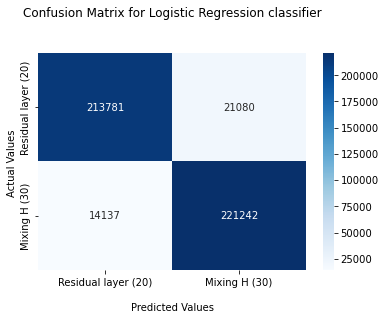

              precision    recall  f1-score   support

        20.0       0.91      0.94      0.92    227918
        30.0       0.94      0.91      0.93    242322

    accuracy                           0.93    470240
   macro avg       0.93      0.93      0.93    470240
weighted avg       0.93      0.93      0.93    470240



In [13]:
y_pred = rf.predict(X_test_std)
confusion_plot()
print(classification_report(y_pred,y_test))

In [ ]:
#is doing better
#Attenuated relative backscatter coefficient. Processed from the CNR.